In [6]:
import math

from twist_controller import Controller
from pid import PID
from yaw_controller import YawController
from lowpass import LowPassFilter
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
vehicle_mass = 1736.35
fuel_capacity = 13.5
brake_deadband = .1
decel_limit = -5
accel_limit = 1.
wheel_radius = 0.2413

wheel_base = 2.8498
steer_ratio = 14.8
max_lat_accel = 3.
max_steer_angle = 8.
min_speed = 0.

In [3]:
MIN_NUM = float('-inf')
MAX_NUM = float('inf')


class PID(object):
    def __init__(self, kp, ki, kd, mn=MIN_NUM, mx=MAX_NUM):
        self.kp = kp
        self.ki = ki
        self.kd = kd
        self.min = mn
        self.max = mx

        self.int_val = self.last_int_val = self.last_error = 0.

    def reset(self):
        self.int_val = 0.0
        self.last_int_val = 0.0

    def step(self, error, sample_time):
        self.last_int_val = self.int_val

        integral = self.int_val + error * sample_time;
        derivative = (error - self.last_error) / sample_time;

        y = self.kp * error + self.ki * self.int_val + self.kd * derivative;
        val = max(self.min, min(y, self.max))

        if val > self.max:
            val = self.max
        elif val < self.min:
            val = self.min
        else:
            self.int_val = integral
        self.last_error = error

        return val

In [4]:
min_speed = 0
throttle_pid = PID(10, 5, 0.005, mn=0, mx=1)
brake_pid = PID(10, 5, 0.005, mn=0, mx=1)
steering_pid = PID(4, 1, 2, mn=-math.pi/3, mx=math.pi/3)
yaw_controller = YawController(wheel_base, steer_ratio, min_speed, max_lat_accel, max_steer_angle)
low_pass_filter = LowPassFilter(1, 1)
controller = Controller(throttle_controller = throttle_pid,
                             brake_controller    = brake_pid,
                             steering_controller = yaw_controller,
                             steering_adjustment_controller = steering_pid,
                             smoothing_filter    = low_pass_filter)

In [5]:
%matplotlib inline

# Settings for Matplot
co = []
steps = [i for i in range(1000)]

throttle_pid.reset()

# Control loop
for i in range(1000):
    pv = get_pv()
    error = pv - 11.1
    throttle = throttle_pid.step(error, 0.02)
    co.append(throttle)

# Plot
plt.plot(steps, co)

NameError: name 'get_pv' is not defined

In [5]:
proposed_velocity = (11.1, 0)
current_velocity = (0, 0)
current_position = (0, 0)

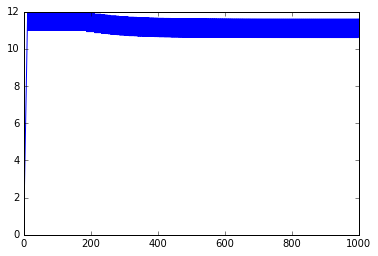

In [6]:
%matplotlib inline
import rospy
rospy.init_node('seya', log_level=rospy.FATAL)

# Settings for Matplot
co = []
steps = [i for i in range(1000)]

# Initialize
proposed_velocity = (11.1, 0)
current_velocity = (0, 0)
current_position = (0, 0)

current_velocity = (0, 0)
velocity = 0
controller.reset()

# Control loop
for i in range(1000):
    proposed_velocity = (11.1, 0)
    throttle, brake, steering = controller.control(sample_time = 0.02,
                                                        proposed_velocity = proposed_velocity, 
                                                        current_velocity = current_velocity)
    velocity = current_velocity[0] + throttle - brake
    current_velocity = (velocity, 0)
    co.append(current_velocity)

# Plot
plt.plot(steps, co)

In [18]:
rospy.signal_shutdown('end')

In [4]:
import panda as pd

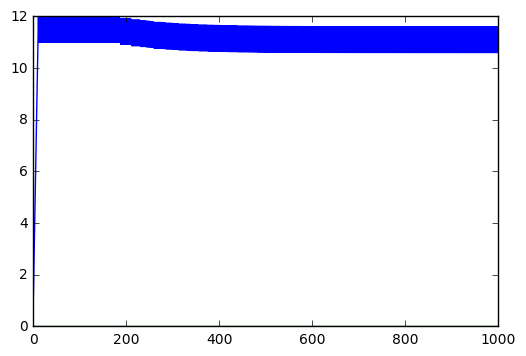

In [22]:
%matplotlib inline

# Settings for Matplot
co = []
steps = [i for i in range(1000)]

# Initialize
proposed_velocity = (11.1, 0)
current_velocity = (0, 0)
current_position = (0, 0)

current_velocity = (0, 0)
velocity = 0
controller.reset()

# Control loop
for i in range(1000):
    proposed_velocity = (11.1, 0)
    throttle, brake, steering = controller.control(sample_time = 0.02,
                                                        proposed_velocity = proposed_velocity, 
                                                        current_velocity = current_velocity)
    velocity = current_velocity[0] + throttle - brake
    current_velocity = (velocity, 0)
    co.append(current_velocity)

# Plot
plt.plot(steps, co)

In [2]:
import pandas as pd
 
data_frame = pd.DataFrame(index=[], columns=['column1', 'column2'])
series = pd.Series(['hoge', 'fuga'], index=data_frame.columns)
 
for i in range(5):
   data_frame = data_frame.append(series, ignore_index = True)
     
data_frame
data_frame.to_csv('a.csv')

In [203]:
import pandas as pd
df = pd.read_csv('pid_log.csv')

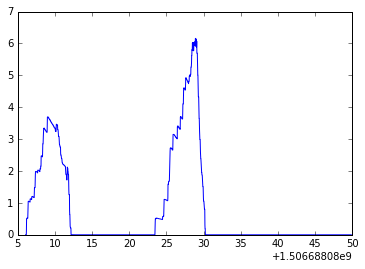

In [208]:
%matplotlib inline

# Plot
plt.plot(df['time'], df['current'])

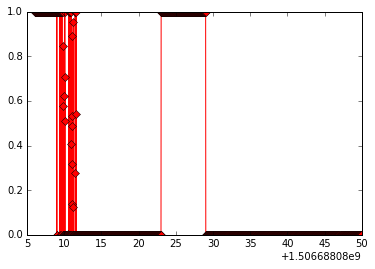

In [209]:
plt.plot(df['time'], df['throttle'], linewidth=1, color="red", marker="D")

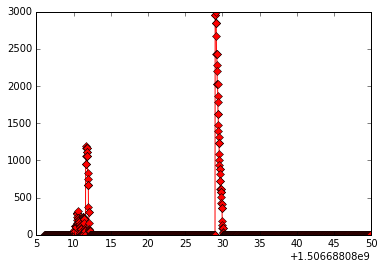

In [210]:
plt.plot(df['time'], df['brake'], linewidth=1, color="red", marker="D")

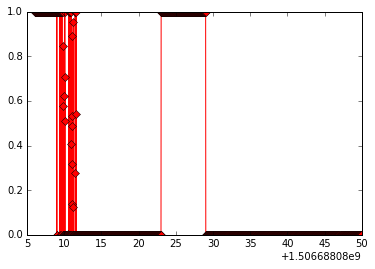

In [211]:
plt.plot(df['time'], df['throttle'], linewidth=1, color="red", marker="D")

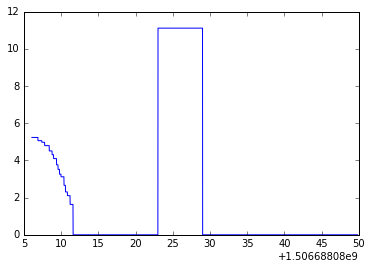

In [212]:
plt.plot(df['time'], df['proposed'])

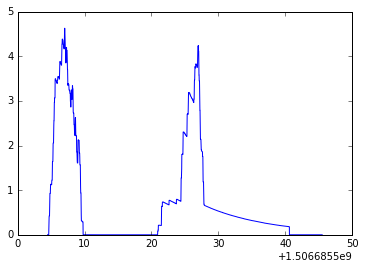

In [201]:
plt.plot(df['time'], df['current'])

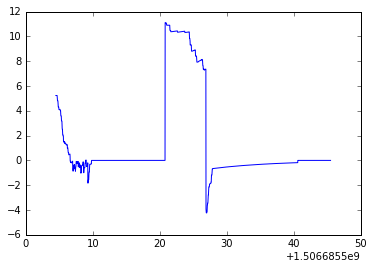

In [202]:
plt.plot(df['time'], df['proposed'] - df['current'])

In [229]:
for i, val in enumerate(df['current']):
    if val > 0.01:
        print("index:{} value:{}", i, val)

('index:{} value:{}', 6, 0.15960400895999999)
('index:{} value:{}', 7, 0.50347209439999996)
('index:{} value:{}', 8, 0.50347209439999996)
('index:{} value:{}', 9, 0.50347209439999996)
('index:{} value:{}', 10, 0.52434752127999995)
('index:{} value:{}', 11, 0.52293800416000003)
('index:{} value:{}', 12, 0.52141896223999995)
('index:{} value:{}', 13, 0.52141896223999995)
('index:{} value:{}', 14, 0.52141896223999995)
('index:{} value:{}', 15, 0.52141896223999995)
('index:{} value:{}', 16, 0.71427917088000004)
('index:{} value:{}', 17, 1.0468290976000001)
('index:{} value:{}', 18, 1.0468290976000001)
('index:{} value:{}', 19, 1.0468290976000001)
('index:{} value:{}', 20, 1.0525883139200001)
('index:{} value:{}', 21, 1.04762751104)
('index:{} value:{}', 22, 1.0451611913600001)
('index:{} value:{}', 23, 1.0451611913600001)
('index:{} value:{}', 24, 1.0451611913600001)
('index:{} value:{}', 25, 1.0451611913600001)
('index:{} value:{}', 26, 1.0451611913600001)
('index:{} value:{}', 27, 1.0326

In [214]:
for i, val in enumerate(df['current']):
    if val >= 6:
        print(i)

1119
1123
1125
1126
1129
1130
1131
1134
1135
1137
1138
1139
1140
1141
1143
1144
1148


In [62]:
df['current'][0:10]

0    7.825922e-07
1    7.835735e-07
2    7.835735e-07
3    7.835735e-07
4    7.812431e-07
5    7.906184e-07
6    8.066859e-02
7    8.066859e-02
8    8.066859e-02
9    1.076217e-01
Name: current, dtype: float64

In [64]:
(df['time'] - 1.50666343e+09)[285]

13.259999990463257

In [57]:
len(df['time'])

1062

In [230]:
df['time'][1205] - df['time'][868]

6.7400000095367432

In [65]:
13.259999990463257 - 7.56

5.699999990463257